# DataFrame Imports

In [1]:
#First import the tools & Libraries needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import make_column_transformer

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer


In [2]:
#Import the TRAINING data

training = pd.read_csv('/Users/khalildavis/Desktop/General Assembly Work/Submissions/Projects/project-2/datasets/train.csv')
training.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
#Import the SampleSub

samplesub = pd.read_csv('/Users/khalildavis/Desktop/General Assembly Work/Submissions/Projects/project-2/datasets/sample_sub_reg_origin.csv')
samplesub.head()

,Id,SalePrice
0,2,181479.1217
1,4,181479.1217
2,6,181479.1217
3,7,181479.1217
4,17,181479.1217


In [5]:
# Import the TEST Data
testing = pd.read_csv('/Users/khalildavis/Desktop/General Assembly Work/Submissions/Projects/project-2/datasets/test.csv')
testing.head()


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [6]:
#Find the mean of the 'SalePrice' column on the traning (dateframe = df)
training['SalePrice'].mean()

181469.70160897123

In [7]:
#Add the mean saleprice column to the testing dataset column

testing['SalePrice'] = training['SalePrice'].mean()
testing.head()

#succesful column add as we can see the 'SalePrice' at the end

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,181469.701609
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,8,2006,WD,181469.701609
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,New,181469.701609
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,7,2007,WD,181469.701609
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,185,0,NaN,NaN,NaN,0,7,2009,WD,181469.701609


In [8]:
#To make a new data frame of ONLY Id & SalePrice we will use the double brackets
testing[['Id', 'SalePrice']]

,Id,SalePrice
0,2658,181469.701609
1,2718,181469.701609
2,2414,181469.701609
3,1989,181469.701609
4,625,181469.701609
...,...,...
873,1662,181469.701609
874,1234,181469.701609
875,1373,181469.701609
876,1672,181469.701609


# EDA

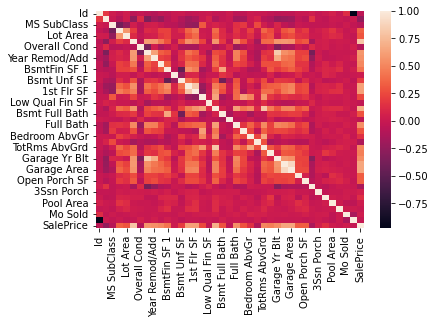

In [9]:
#See correlation model of the training set to help choose with features to try in the model

sns.heatmap(training.corr());



In [10]:
#These are the features I would like to try first
#Then increase or decrease as I go along

#Lot Area, BsmtFin SF 1 , 1st Flr SF, 2nd Flr SF, Full Bath, 
# Garage Area, Bedroom AbvGr, Kitchen AbvGr, Wood Deck SF, 
#Open Porch SF, Pool Area
# 
# SN: Catergorical -columns 40-43, 16, 17, 28-29,   

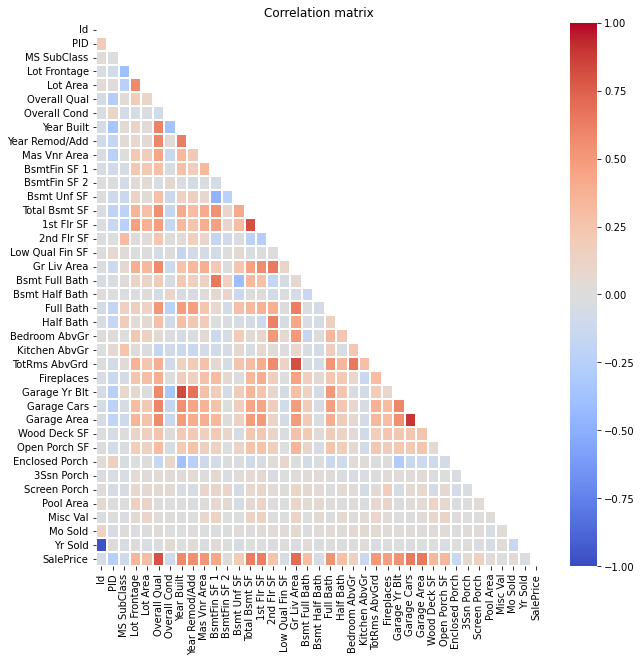

In [11]:
#Create a correlation Matrix for the features

mask = np.zeros_like(training.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(
    training.corr(),
    cmap='coolwarm',
    annot=False,
    mask=mask,
    vmin=-1.,
    vmax=1.,
    linewidths=.1,
    center=0
)

plt.title('Correlation matrix'); 



In [12]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [85]:
#Establish our X & y for train-test-split (tts)

X = training[['Lot Area','Overall Qual', 'Overall Cond', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
'1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',   
'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 
'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF','Open Porch SF', 'Enclosed Porch', '3Ssn Porch',        
'Screen Porch', 'Pool Area'
]]

y = training['SalePrice']

In [86]:
#Performed tts
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=444)

In [87]:
#Imported SimpleImputer to fill missive values by 'mean'

si = SimpleImputer(strategy='mean')

In [88]:
#Fit & transform training data

X_train_filled = si.fit_transform(X_train, y_train)

In [89]:
X_test_filled = si.transform(X_test)

In [90]:
X_train_filled = pd.DataFrame(X_train_filled, columns=X_train.columns)
X_train_filled.head()

,Lot Area,Overall Qual,Overall Cond,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,...,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area
0,12929.0,6.0,6.0,697.0,0.0,384.0,1081.0,1081.0,0.0,0.0,...,5.0,0.0,1.0,401.0,36.0,82.0,0.0,0.0,0.0,0.0
1,2544.0,7.0,5.0,368.0,42.0,190.0,600.0,600.0,600.0,0.0,...,4.0,0.0,2.0,480.0,0.0,172.0,0.0,0.0,0.0,0.0
2,9170.0,5.0,7.0,698.0,96.0,420.0,1214.0,1214.0,0.0,0.0,...,6.0,0.0,2.0,461.0,0.0,0.0,184.0,0.0,0.0,0.0
3,9100.0,5.0,6.0,0.0,0.0,742.0,742.0,779.0,0.0,156.0,...,4.0,0.0,1.0,308.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8883.0,7.0,5.0,608.0,321.0,0.0,929.0,946.0,927.0,0.0,...,7.0,1.0,2.0,619.0,108.0,48.0,0.0,0.0,144.0,0.0


In [91]:
#ss = StandardScaler()

In [92]:
#X_train_filled_ss = ss.fit_transform(X_train)

In [93]:
#X_test_filled_ss = ss.transform(X_test_filled)

In [94]:
linreg = LinearRegression()

In [95]:
type(X_train_filled)

pandas.core.frame.DataFrame

In [96]:
#df_scaled = pd.DataFrame(ss.fit_transform(df),columns = df.columns)

In [97]:
linreg.fit(X_train_filled, y_train)

LinearRegression()

In [98]:
cross_val_score(linreg, X_train_filled, y_train)

array([0.84478957, 0.85275308, 0.82786471, 0.87473665, 0.66427353])

In [122]:
cross_val_score(linreg, X_test_filled, y_test)

array([0.80716149, 0.67448898, 0.76559949, 0.77957149, 0.02208469])

In [106]:
#Treat the testing data of how i cleaned and treated the training
testing[['Lot Area','Overall Qual', 'Overall Cond', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
'1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',   
'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 
'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF','Open Porch SF', 'Enclosed Porch', '3Ssn Porch',        
'Screen Porch', 'Pool Area'
]]

,Lot Area,Overall Qual,Overall Cond,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,...,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area
0,9142,6,8,0,0,1020,1020,908,1020,0,...,9,0,1,440,0,60,112,0,0,0
1,9662,5,4,0,0,1967,1967,1967,0,0,...,10,0,2,580,170,0,0,0,0,0
2,17104,7,5,554,0,100,654,664,832,0,...,7,1,2,426,100,24,0,0,0,0
3,8520,5,6,0,0,968,968,968,0,0,...,5,0,2,480,0,0,184,0,0,0
4,9500,6,5,609,0,785,1394,1394,0,0,...,6,2,2,514,0,76,0,0,185,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,8000,6,6,931,153,0,1084,1084,793,0,...,8,1,2,488,0,96,0,0,0,0
874,14670,6,7,575,0,529,1104,1104,884,0,...,9,1,2,480,0,230,0,0,0,0
875,8250,5,5,250,492,210,952,1211,0,0,...,5,1,1,322,0,63,0,0,0,0
876,9000,4,6,616,0,248,864,864,0,0,...,5,0,2,528,0,0,0,0,0,0


In [107]:
#set up the predictions

linreg_preds =linreg.predict(testing[['Lot Area','Overall Qual', 'Overall Cond', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
'1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',   
'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 
'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF','Open Porch SF', 'Enclosed Porch', '3Ssn Porch',        
'Screen Porch', 'Pool Area']])

linreg_preds

array([ 1.53300604e+05,  1.58420708e+05,  2.08445594e+05,  1.11461220e+05,
        2.00449148e+05,  7.56221294e+04,  9.14384493e+04,  1.30614154e+05,
        1.83044598e+05,  1.74976603e+05,  1.65375391e+05,  1.35059937e+05,
        1.65201359e+05,  2.77442950e+05,  1.81240438e+05,  1.12336007e+05,
        1.67522212e+05,  1.25704077e+05,  2.25458523e+05,  2.23605742e+05,
        1.31294914e+05,  1.24335385e+05,  2.05249948e+05,  1.78562002e+05,
        1.78538312e+05,  1.02454470e+05,  1.21525759e+05,  1.26684309e+05,
        1.61527007e+05,  2.28428038e+04,  9.45939423e+04,  8.84219862e+04,
        2.49257959e+05,  1.44815787e+05,  2.14621423e+05,  1.73789417e+05,
        1.21887369e+05,  6.83472397e+04,  8.65322326e+04,  1.85945036e+05,
        1.40457191e+05,  2.17933679e+05,  1.56064362e+05,  1.74110408e+05,
        2.31606654e+05,  7.71589795e+04,  2.21323884e+05,  1.21498291e+05,
        1.19689526e+05,  1.21612079e+05,  1.14861039e+05,  2.47158220e+05,
        2.52502799e+05,  

In [115]:
lasso = Lasso(alpha=1)

In [118]:
lasso.fit(X_train_filled, y_train)

Lasso(alpha=1)

In [119]:
lasso.predict(testing[['Lot Area','Overall Qual', 'Overall Cond', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
'1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',   
'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 
'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF','Open Porch SF', 'Enclosed Porch', '3Ssn Porch',        
'Screen Porch', 'Pool Area']])

array([ 1.53334813e+05,  1.58450748e+05,  2.08433226e+05,  1.11459459e+05,
        2.00441400e+05,  7.56208624e+04,  9.14375960e+04,  1.30610473e+05,
        1.83058595e+05,  1.74985973e+05,  1.65372258e+05,  1.35058531e+05,
        1.65207074e+05,  2.77450493e+05,  1.81236148e+05,  1.12329858e+05,
        1.67554387e+05,  1.25704623e+05,  2.25450660e+05,  2.23604763e+05,
        1.31288436e+05,  1.24344572e+05,  2.05243825e+05,  1.78566386e+05,
        1.78539649e+05,  1.02457782e+05,  1.21524101e+05,  1.26683621e+05,
        1.61523644e+05,  2.28389986e+04,  9.46062263e+04,  8.84250035e+04,
        2.49265104e+05,  1.44829541e+05,  2.14622863e+05,  1.73796371e+05,
        1.21879951e+05,  6.83413606e+04,  8.65292594e+04,  1.85954475e+05,
        1.40458530e+05,  2.17917899e+05,  1.56059230e+05,  1.74103910e+05,
        2.31601617e+05,  7.71517959e+04,  2.21322333e+05,  1.21499921e+05,
        1.19687508e+05,  1.21606088e+05,  1.14861985e+05,  2.47155266e+05,
        2.52503630e+05,  

In [120]:
#Make it equal to the testing 'SalePrice' column

testing['SalePrice'] =linreg_preds

In [121]:
#Check if columns are good for submission
#153_300.603994
testing[['Id', 'SalePrice']]

,Id,SalePrice
0,2658,153300.603994
1,2718,158420.707821
2,2414,208445.593725
3,1989,111461.220242
4,625,200449.147536
...,...,...
873,1662,214143.083676
874,1234,214160.103294
875,1373,117970.672476
876,1672,95669.304638


In [110]:
#Submit to Kaggle

#testing[['Id', 'SalePrice']].to_csv('Basic_LR_12F.csv', index=False)

In [111]:
#Create this into an csv & submit to Kaggle

#X_test_filled[['Id', 'SalePrice']].to_csv('Bas_tts-Lass-12F.csv', index = False)

In [112]:
#Only submitting y predictions, so only 
#Take a df and make it csv